**Installing Dependencies**

**Make sure to use Google Colab - T4 GPU in Runtime Settings**

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.60 MiB | 18.94 MiB/s, done.
Resolving deltas: 100% (10987/10987), done.
/content/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00
Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


**Linking Roboflow**

In [2]:
API_KEY = __INSERT_API_KEY_HERE__

%cd /content/yolov5

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("stevens-institute-of-technology-aai800").project("bee-detection-aqdkr")
dataset = project.version(1).download("yolov5")

# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

#this is the model configuration we will use for our tutorial
%cat /content/yolov5/models/yolov5s.yaml

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successf

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bee-Detection-1 in yolov5pytorch:: 100%|██████████| 6100/6100 [00:01<00:00, 3831.17it/s]


names:
- '0'
nc: 1
roboflow:
  license: CC BY 4.0
  project: bee-detection-aqdkr
  url: https://universe.roboflow.com/stevens-institute-of-technology-aai800/bee-detection-aqdkr/dataset/1
  version: 1
  workspace: stevens-institute-of-technology-aai800
test: ../test/images
train: Bee-Detection-1/train/images
val: Bee-Detection-1/valid/images
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, 

**Writing YAML Files**

In [3]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [4]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Train Custom YOLOv5

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
2023-10-11 01:29:59.640459: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 01:30:00.505109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=, cfg=./models/yolov5s.yaml, data=/content/yolov5/Bee-Detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1

**Displaying Statistics**

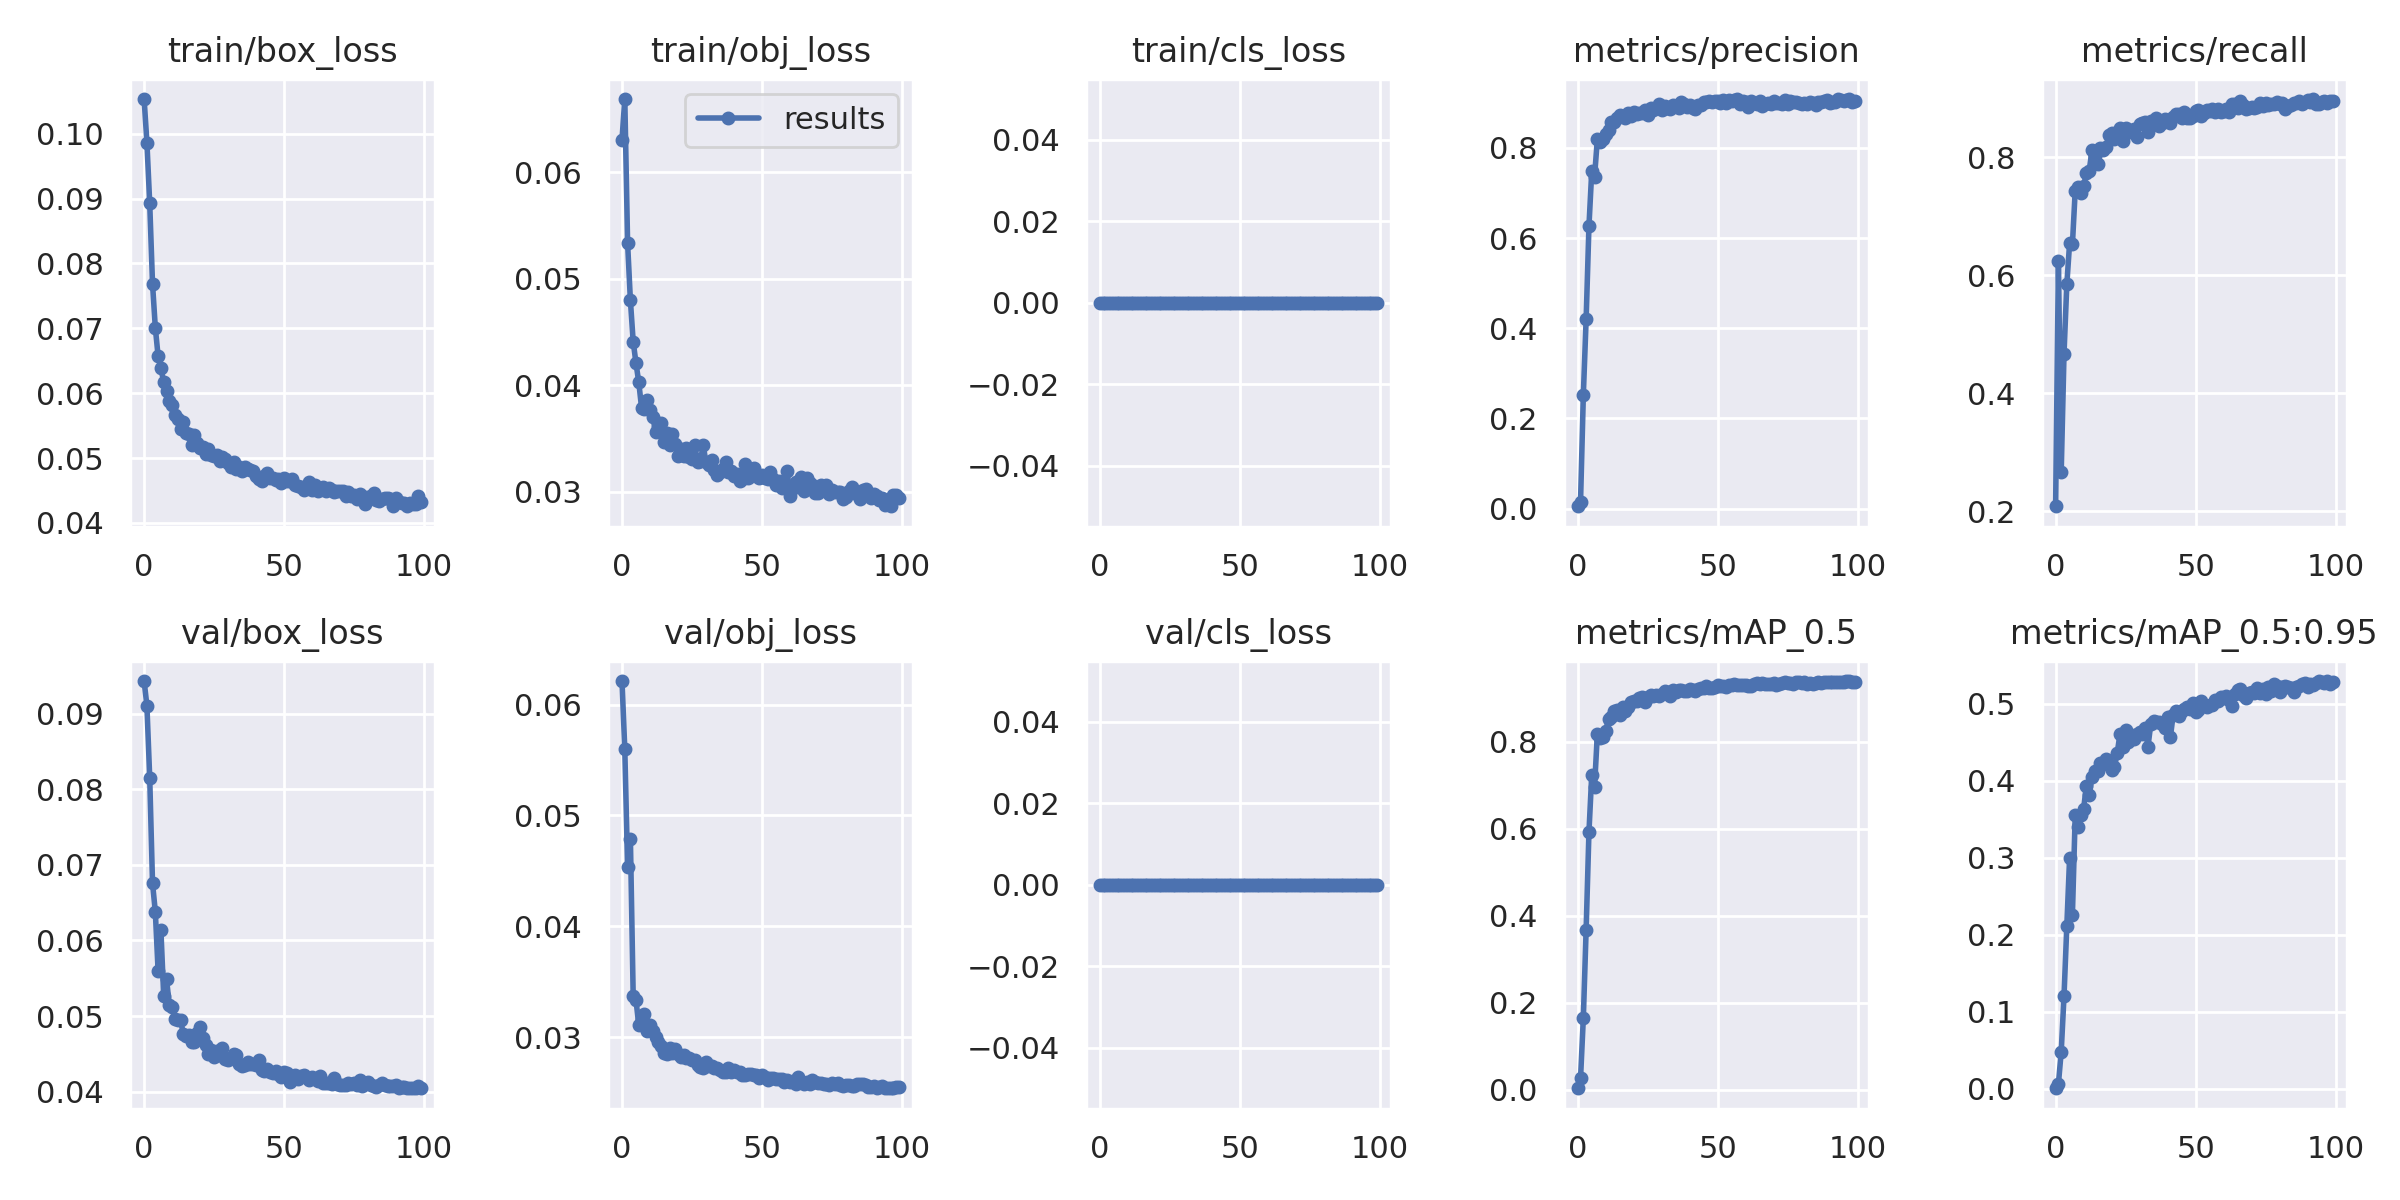

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

**Run Inference with Trained Weights - Run Testing Images**

In [2]:
%ls

# trained weights are saved by default in our weights folder
%ls runs/

%ls runs/train/yolov5s_results/weights

# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/

# Running Inference after training model directly - best.pt is stored in a different location
#!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source Bee-Detection-1/test/images --line-thickness 1 --hide-labels --hide-conf

# Running Inference with a previously run best.pt (different location) -> put the best.pt file inside content/yolov5/best.pt. Same location as detect.py
!python detect.py --weights best.pt --img 416 --conf 0.4 --source Bee-Detection-1/test/images --line-thickness 1

Bee-Detection-1/  CONTRIBUTING.md  models/           segment/
benchmarks.py     data/            __pycache__/      setup.cfg
best.pt           detect.py        README.md         train.py
CITATION.cff      export.py        README.zh-CN.md   tutorial.ipynb
classify/         hubconf.py       requirements.txt  utils/
content/          LICENSE          runs/             val.py
detect/
ls: cannot access 'runs/train/yolov5s_results/weights': No such file or directory
/content/yolov5
detect: weights=['best.pt'], source=Bee-Detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.0.1+cu118 C

In [ ]:
import os
print(os.getcwd())

#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display
import os

directory = '/content/yolov5/runs/detect/exp7/' # change the exp number here if needed to point to a different folder
for imageName in glob.glob(os.path.join(directory, '*.jpg')):
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!zip -r /content/yolov5Files.zip /content/yolov5/

from google.colab import files
files.download("/content/yolov5Files.zip")

Streaming output truncated to the last 5000 lines.
  adding: content/yolov5/Bee-Detection-1/train/labels/cuper_3_7164_7163_jpeg.rf.c7a1cfe344b2b5677a39163a1243bcd9.txt (deflated 59%)
  adding: content/yolov5/Bee-Detection-1/train/labels/IMG_4757_jpeg.rf.033b9ea6042028dfb7c3883972f163b6.txt (deflated 30%)
  adding: content/yolov5/Bee-Detection-1/train/labels/IMG_9386_jpeg.rf.84967ab224eecd08cf73cd459f318669.txt (deflated 61%)
  adding: content/yolov5/Bee-Detection-1/train/labels/IMG_9940_jpeg.rf.d909d02b51838985bebf251c65d83a46.txt (deflated 38%)
  adding: content/yolov5/Bee-Detection-1/train/labels/gil_IMG_7293667_jpeg.rf.7efa624ff0962f22dfc75a0cd27c3bac.txt (deflated 70%)
  adding: content/yolov5/Bee-Detection-1/train/labels/IMG_9310_jpeg.rf.4ccb9029cbac384d04c40652c582006c.txt (deflated 56%)
  adding: content/yolov5/Bee-Detection-1/train/labels/camp_IMG_7263_406_jpeg.rf.cda0c2f309f28b87315ff75c6ee375c4.txt (deflated 38%)
  adding: content/yolov5/Bee-Detection-1/train/labels/IMG_9644_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>